# Project: CIFAR-10 Image Classification using a CNN

[cite_start]**Objective:** This project implements a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset[cite: 2]. [cite_start]The primary goal is to build, train, and evaluate a deep learning model using TensorFlow and Keras[cite: 6].

---

### 1. Dataset
The model is trained on the **CIFAR-10 dataset**, a widely used benchmark for image classification tasks. [cite_start]It consists of 60,000 32x32 color images in 10 distinct classes (e.g., airplane, automobile, bird, cat)[cite: 2, 18].

### 2. Technologies Used
* Python
* TensorFlow / Keras
* NumPy
* Matplotlib (for visualizing data and results)

### 3. Model Architecture
The CNN architecture is built according to the assignment guidelines and consists of the following sequential layers:

* **Input Layer** (handling the 32x32x3 images)
* [cite_start]**Conv2D Layer 1** (ReLU activation) [cite: 14]
* [cite_start]**MaxPooling2D Layer 1** [cite: 15]
* [cite_start]**Conv2D Layer 2** (ReLU activation) [cite: 14]
* [cite_start]**MaxPooling2D Layer 2** [cite: 15]
* [cite_start]**Conv2D Layer 3** (ReLU activation) [cite: 14]
* [cite_start]**MaxPooling2D Layer 3** [cite: 15]
* [cite_start]**Flatten Layer** (to convert 2D feature maps to a 1D vector) [cite: 16]
* [cite_start]**Dense Layer** (ReLU activation) [cite: 17]
* [cite_start]**Output Layer** (Softmax activation for 10-class classification) [cite: 18]

---

In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# --- Step 1: Load the CIFAR-10 Dataset ---

print("Loading CIFAR-10 dataset...")
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
print("Dataset loaded successfully.")

# Check the shape of the data
print("Training images shape:", train_images.shape)
print("Training labels shape:", train_labels.shape)
print("Test images shape:", test_images.shape)
print("Test labels shape:", test_labels.shape)

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Dataset loaded successfully.
Training images shape: (50000, 32, 32, 3)
Training labels shape: (50000, 1)
Test images shape: (10000, 32, 32, 3)
Test labels shape: (10000, 1)


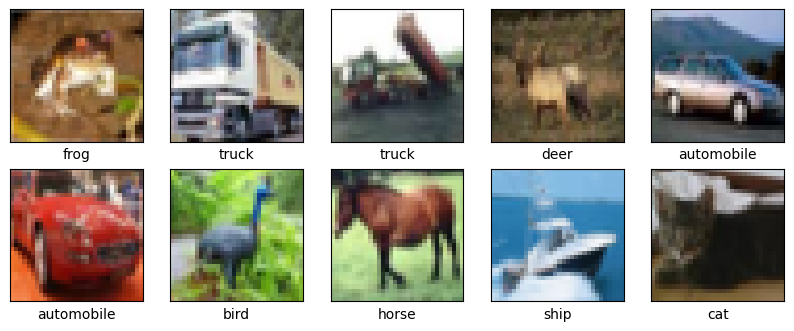

In [2]:
# Define the class names (in order)
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

# Plot the first 10 images from the training set
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i])
    # The CIFAR labels are arrays, so you need to access the first element
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

In [3]:
# --- Step 2: Preprocess the Data ---

# Normalize pixel values to be between 0 and 1
print("Normalizing data...")
train_images, test_images = train_images / 255.0, test_images / 255.0
print("Data normalization complete.")

# Check the pixel value range of the first image after normalization
print("Min value in a test image after normalization:", test_images[0].min())
print("Max value in a test image after normalization:", test_images[0].max())

Normalizing data...
Data normalization complete.
Min value in a test image after normalization: 0.050980392156862744
Max value in a test image after normalization: 1.0


In [4]:
# --- Step 3: Build the CNN Model ---

model = models.Sequential()

# === Layer 1: Conv + Pool ===
# Requirement: Three convolutional layers with ReLU
# Requirement: Each convolutional layer must be followed by a MaxPooling layer
# First Conv2D layer: 32 filters, 3x3 kernel size, ReLU activation
# We also specify input_shape for the first layer (32x32 pixels, 3 color channels)
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2))) #

# === Layer 2: Conv + Pool ===
# Second Conv2D layer: 64 filters, 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #
model.add(layers.MaxPooling2D((2, 2))) #

# === Layer 3: Conv + Pool ===
# Third Conv2D layer: 64 filters, 3x3 kernel
model.add(layers.Conv2D(64, (3, 3), activation='relu')) #
model.add(layers.MaxPooling2D((2, 2))) #

# --- Flattening and Dense Layers ---

# Requirement: A Flatten layer
# This converts the 2D feature maps (from the last pooling layer) into a 1D vector
model.add(layers.Flatten())

# Requirement: One fully connected (Dense) layer with ReLU
# We'll use 64 units, a common choice
model.add(layers.Dense(64, activation='relu'))

# Requirement: A final Softmax output layer for 10-class classification
# 10 units (one for each class) and softmax activation to get probabilities
model.add(layers.Dense(10, activation='softmax'))

# --- Model Summary ---
# Now, let's print a summary of the model you just built
print("Model built successfully.")
model.summary()

Model built successfully.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 73,418 (286.79 KB)

 Trainable params: 73,418 (286.79 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# --- Step 4: Compile the Model ---

# We need to specify three things:
# 1. Optimizer: 'adam' is a popular and effective choice.
# 2. Loss Function: 'sparse_categorical_crossentropy' is used because
#    our labels are simple integers (0-9), not one-hot encoded vectors.
# 3. Metrics: We want to track 'accuracy' during training.

print("Compiling the model...")
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
              metrics=['accuracy'])
print("Model compiled successfully.")

Compiling the model...
Model compiled successfully.


In [6]:
# --- Step 5: Train and Evaluate the Model ---

# Train the model
# We pass it the training images and labels
# We set epochs=10 (how many times to go through the entire dataset)
# We provide the test data as validation_data to monitor performance on unseen data
print("Starting model training...")
history = model.fit(train_images, train_labels,
                    epochs=10,
                    validation_data=(test_images, test_labels))
print("Model training complete.")

# --- Evaluate the Model ---
# Now, let's check the model's final performance on the test set.
print("\nEvaluating model on test data...")
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f"\nTest accuracy: {test_acc:.4f}")
print(f"Test loss: {test_loss:.4f}")

Starting model training...
Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 44s 27ms/step - accuracy: 0.3441 - loss: 1.7754 - val_accuracy: 0.5268 - val_loss: 1.3368
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 82s 27ms/step - accuracy: 0.5601 - loss: 1.2334 - val_accuracy: 0.5909 - val_loss: 1.1645
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 40s 26ms/step - accuracy: 0.6355 - loss: 1.0361 - val_accuracy: 0.6564 - val_loss: 0.9864
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 26ms/step - accuracy: 0.6719 - loss: 0.9387 - val_accuracy: 0.6380 - val_loss: 1.0382
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 26ms/step - accuracy: 0.7011 - loss: 0.8555 - val_accuracy: 0.6892 - val_loss: 0.8999
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.7177 - loss: 0.8072 - val_accuracy: 0.6850 - val_loss: 0.9274
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.7388 - loss: 0.7467 - val_accuracy: 0.6802 - val_loss: 0.9544
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 41s 25m

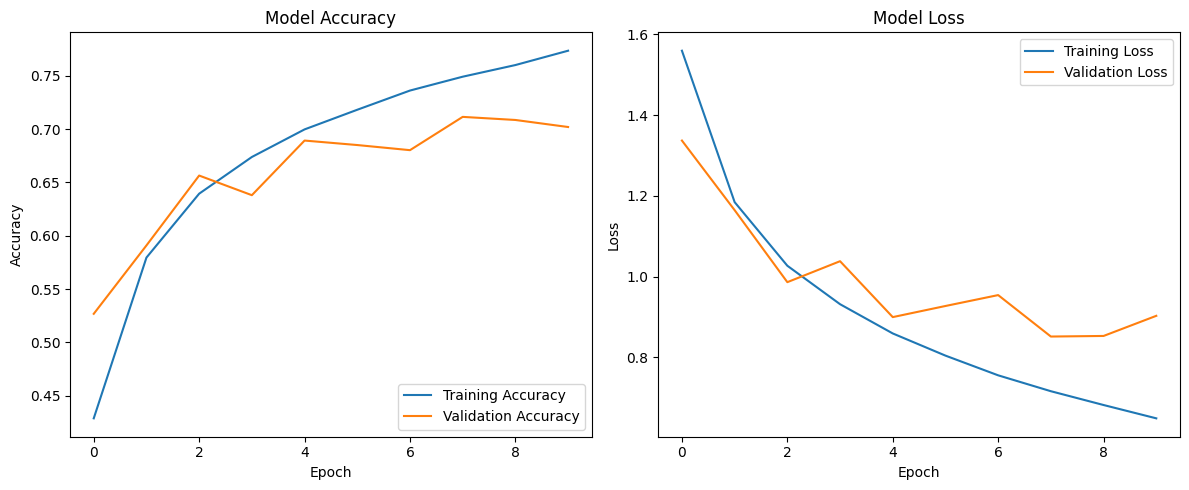

In [7]:
# --- Step 6: Plot Training and Validation Graphs ---

# The 'history' object holds a record of the loss and accuracy
# for both the training and validation datasets for each epoch.

# Let's plot the accuracy
plt.figure(figsize=(12, 5))

# Plot training & validation accuracy
plt.subplot(1, 2, 1) # 1 row, 2 columns, plot 1
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Plot training & validation loss
plt.subplot(1, 2, 2) # 1 row, 2 columns, plot 2
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout() # Adjusts plots to prevent overlap
plt.show()

# Module 7: CNN for CIFAR-10 Image Classification

This notebook contains the full implementation of a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset, as per the assignment guidelines.

---

## 1. Complete Python Code

(In your notebook, you don't need to copy the code here. Just make sure all your Python cells are clean, well-commented, and in the correct order. The code you've already run for Steps 1-6 is what's needed.)

---

## [cite_start]2. Explanation of Network Architecture [cite: 24]

The model was built using the Keras Sequential API. [cite_start]The architecture was designed as specified in the assignment [cite: 13] and consists of the following layers:



* **Input Layer:** The model implicitly starts with an input layer that expects 32x32 pixel images with 3 color channels (RGB), matching the CIFAR-10 data.

* **Conv2D Layers (1, 2, & 3):**
    * [cite_start]**Description:** The model uses three convolutional layers[cite: 14]. These are the core feature extractors of the CNN. They apply a set of learnable filters (e.g., 32 filters, then 64) that slide across the image to detect features like edges, corners, and textures.
    * [cite_start]**Activation:** 'ReLU' (Rectified Linear Unit) activation was used in each[cite: 14]. This introduces non-linearity, allowing the model to learn more complex patterns.

* **MaxPooling2D Layers (1, 2, & 3):**
    * [cite_start]**Description:** Each convolutional layer is followed by a MaxPooling2D layer[cite: 15].
    * **Purpose:** This layer downsamples the feature map by taking the *maximum* value from a 2x2 window. This reduces the spatial dimensions (height/width) of the data, which decreases computational load and helps the model become more robust to variations in feature positions.

* **Flatten Layer:**
    * [cite_start]**Description:** A Flatten layer is used after the final pooling layer[cite: 16].
    * **Purpose:** This layer is a crucial bridge. It takes the 3D feature maps (e.g., 2x2x64) and "flattens" them into a single, long 1D vector (e.g., 256 elements). This is necessary to feed the data into the final fully-connected `Dense` layers.

* **Dense Layer (Fully Connected):**
    * [cite_start]**Description:** This is the first `Dense` layer, with 64 units and 'ReLU' activation[cite: 17].
    * **Purpose:** This layer learns to combine the high-level features detected by the convolutional/pooling stack. It performs classification based on these learned features.

* **Softmax Output Layer:**
    * [cite_start]**Description:** The final layer is a `Dense` layer with 10 units and a 'softmax' activation function[cite: 18].
    * **Purpose:** The 10 units correspond to the 10 possible image classes. The 'softmax' function converts the model's raw output scores into a probability distribution, showing the model's confidence for each of the 10 classes. The class with the highest probability is the model's final prediction.

---

## [cite_start]3. Training Details [cite: 25]

The model was compiled and trained using the following parameters:

* **Optimizer:** `Adam`
    * *Rationale: A popular, efficient, and widely used optimizer that adapts the learning rate during training.*
* **Loss Function:** `sparse_categorical_crossentropy`
    * *Rationale: This is the standard loss function for multi-class classification problems where the labels are provided as simple integers (0-9) rather than one-hot encoded vectors.*
* **Metrics:** `accuracy`
    * *Rationale: The primary metric used to monitor the model's performance during training and validation.*
* **Epochs:** `10`
    * *Rationale: The model was trained for 10 full passes over the entire training dataset.*

---

## [cite_start]4. Summary of Results and Observations [cite: 26]

### Final Performance
* **Final Test Loss:** 0.9031
* **Final Test Accuracy:** **70.19%**

### Model Performance Graphs

Cell 7

![Training and Validation Plots](training_history_plots.png)

### Observations
* The model trained successfully, with the **training accuracy** steadily climbing to ~78% and the **training loss** decreasing to ~0.63.
* The **validation accuracy** (on the unseen test data) followed a similar upward trend, peaking at **71.14% around Epoch 8** and finishing at 70.19%.
* The **validation loss** reached its minimum around Epoch 8 (0.8518) and began to stagnate or slightly increase in the final epochs. This suggests that training for more than 10 epochs might not yield significant improvements and could lead to mild overfitting (where the model starts memorizing the training data instead of generalizing).
* Overall, a final test accuracy of 70.19% is a strong result for this specific 3-layer CNN architecture on the CIFAR-10 dataset, demonstrating its effectiveness in learning and classifying complex image features.

---